# 1. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ 1:1 Ï¶ùÍ∞ï + YOLO Î™®Îç∏Î°ú ÏñºÍµ¥ ÌÅ¨Î°≠ + 4Í∞ú ÌëúÏ†ï ÌïôÏäµ

In [1]:
!pip install ultralytics

  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 10.8 MB/s eta 0:00:00
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5/5 [ultralytics] [ultralytics]n]


In [2]:
#Ï¶ùÍ∞ïÏùÑ Ìï¥Î≥¥Ïûê. Ïö∞ÏÑ† ÏÉâÏÉÅÍ≥º Îπõ, Í∑∏Î¶¨Í≥† ÏïÑÏ£º ÏïΩÌïú ÌöåÏ†ÑÎßå
import os
from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms import functional as TF

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÎîîÎ†âÌÜ†Î¶¨
root_dir = '/workspace/yoons/data/train/image/train'

# Ïù¥ÎØ∏ÏßÄ Ï¶ùÍ∞ï Ï†ïÏùò
augmentation = transforms.Compose([
    #transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    #transforms.RandomHorizontalFlip(p=0.7),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2),
    transforms.RandomRotation(degrees=15)
])

# ÌÅ¥ÎûòÏä§ Ìè¥Îçî ÌÉêÏÉâ
classes = ['anger', 'happy', 'panic', 'sadness']

for class_name in classes:
    class_dir = os.path.join(root_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        # Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎßå Ï≤òÎ¶¨
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            continue

        try:
            # Ïù¥ÎØ∏ÏßÄ Ïó¥Í∏∞
            img = Image.open(img_path).convert('RGB')

            # Ï¶ùÍ∞ï Ï†ÅÏö©
            augmented_img = augmentation(img)

            # Ï†ÄÏû• Í≤ΩÎ°ú
            base_name, ext = os.path.splitext(img_name)
            aug_img_name = f"{base_name}_aug{ext}"
            aug_img_path = os.path.join(class_dir, aug_img_name)

            # Ï†ÄÏû•
            augmented_img.save(aug_img_path)
            print(f"Saved: {aug_img_path}")

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


Saved: /workspace/yoons/data/train/image/train/anger/a7t37887710b0a6e76ffa95b7ea82ee97d0e07fa078461f9e9f917121b720d3gw_aug.jpg
Saved: /workspace/yoons/data/train/image/train/anger/wdts42dd7687325595a8219a557b49de5045cfd3cc6d13ad7455efebf7ae7radb_aug.jpg
Saved: /workspace/yoons/data/train/image/train/anger/itr74b8c3b5c68694148e93d67101c73af3a736c3f3d079044798b1aac419dx98_aug.jpg
Saved: /workspace/yoons/data/train/image/train/anger/tvcn7d8035b8533b951eddcea1d6264355c211a8ee758850c5e2c228e2952waws_aug.jpg
Saved: /workspace/yoons/data/train/image/train/anger/n6lkd036722c077408d03aeecd81c45342c4a33c85cea879abb0daec4cad3gkyn_aug.jpg
Saved: /workspace/yoons/data/train/image/train/anger/9bjsea064770565652e6bad5e7b2e1e7c8a60a034c90b4c26dd4578512001rz0b_aug.jpg
Saved: /workspace/yoons/data/train/image/train/anger/xs0xf044a4747c62b4fc8d90225abd44a6364adaaedaaaa25b2a8bf0450a49p4e_aug.jpeg
Saved: /workspace/yoons/data/train/image/train/anger/l93w92887e7e1f91a7821661618e9f48f149198091c7f2977c9fcfb63

In [4]:
#labelÎèÑ ÏóÖÎç∞Ïù¥Ìä∏
import os
import json

# ÌÅ¥ÎûòÏä§ Î¶¨Ïä§Ìä∏
classes = ['anger', 'happy', 'panic', 'sadness']

# Î£®Ìä∏ Í≤ΩÎ°ú
root_dir = '/workspace/yoons/data/train/image/train/'

# json Í≤ΩÎ°ú
json_dir = '/workspace/yoons/data/train/label/train/'  # Í∞Å ÌÅ¥ÎûòÏä§ json ÌååÏùºÏù¥ ÏûàÎäî Ìè¥Îçî
json_ext = '.json'

for cls in classes:
    json_path = os.path.join(json_dir, f'train_{cls}.json')
    img_folder = os.path.join(root_dir, cls)

    # Í∏∞Ï°¥ JSON Î∂àÎü¨Ïò§Í∏∞
    with open(json_path, 'r', encoding='cp949') as f:
        data = json.load(f)

    # Í∏∞Ï°¥ ÌååÏùº Ïù¥Î¶Ñ Î™©Î°ù
    original_names = {item['filename']: item for item in data}

    # Ï¶ùÍ∞ï Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨
    new_entries = []
    for fname in os.listdir(img_folder):
        if fname.endswith('_aug.jpg'):
            # ÏõêÎ≥∏ Ïù¥Î¶Ñ Íµ¨ÌïòÍ∏∞
            orig_name = fname.replace('_aug.jpg', '.jpg')
            if orig_name in original_names:
                # Í∏∞Ï°¥ Ï†ïÎ≥¥ Î≥µÏÇ¨ ÌõÑ filenameÎßå ÏàòÏ†ï
                new_entry = original_names[orig_name].copy()
                new_entry['filename'] = fname
                new_entries.append(new_entry)
            else:
                print(f"Warning: ÏõêÎ≥∏ Ï†ïÎ≥¥ ÏóÜÏùå ‚Üí {fname}")

    # Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
    data.extend(new_entries)

    # ÎçÆÏñ¥Ïì∞Í∏∞ ÎòêÎäî ÏÉà ÌååÏùºÎ°ú Ï†ÄÏû•
    new_json_path = os.path.join(json_dir, f'train_{cls}_augmented.json')
    with open(new_json_path, 'w', encoding='cp949') as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

    print(f"‚úÖ {cls} ÌÅ¥ÎûòÏä§: {len(new_entries)}Í∞ú Ìï≠Î™© Ï∂îÍ∞Ä ÏôÑÎ£å ‚Üí {new_json_path}")


‚úÖ anger ÌÅ¥ÎûòÏä§: 1480Í∞ú Ìï≠Î™© Ï∂îÍ∞Ä ÏôÑÎ£å ‚Üí /workspace/yoons/data/train/label/train/train_anger_augmented.json
‚úÖ happy ÌÅ¥ÎûòÏä§: 1464Í∞ú Ìï≠Î™© Ï∂îÍ∞Ä ÏôÑÎ£å ‚Üí /workspace/yoons/data/train/label/train/train_happy_augmented.json
‚úÖ panic ÌÅ¥ÎûòÏä§: 1481Í∞ú Ìï≠Î™© Ï∂îÍ∞Ä ÏôÑÎ£å ‚Üí /workspace/yoons/data/train/label/train/train_panic_augmented.json
‚úÖ sadness ÌÅ¥ÎûòÏä§: 1463Í∞ú Ìï≠Î™© Ï∂îÍ∞Ä ÏôÑÎ£å ‚Üí /workspace/yoons/data/train/label/train/train_sadness_augmented.json


In [5]:
label_map = {
    "Î∂ÑÎÖ∏": 0,
    "Í∏∞ÏÅ®": 1,
    "ÎãπÌô©": 2,
    "Ïä¨Ìîî": 3
}


In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÍ≥º JSON ÌååÏùºÏùÑ ÏùΩÏñ¥ YOLO ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Ï†ÄÏû•
import os
import json
from PIL import Image

def find_image_recursive(img_folder, filename):
    for root, _, files in os.walk(img_folder):
        if filename in files:
            return os.path.join(root, filename)
    return None

def process_json(json_path, img_folder, label_output_folder):
    label_map = {"Î∂ÑÎÖ∏": 0, "Í∏∞ÏÅ®": 1, "ÎãπÌô©": 2, "Ïä¨Ìîî": 3}

    with open(json_path, encoding='cp949') as f:
        data = json.load(f)

    for entry in data:
        filename = entry["filename"]
        img_path = find_image_recursive(img_folder, filename)

        if img_path is None:
            print(f"‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: {filename}")
            continue

        try:
            img = Image.open(img_path)
            width, height = img.size
        except Exception as e:
            print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Ïó¥Í∏∞ Ïã§Ìå®: {img_path}, Ïò§Î•ò: {e}")
            continue

        # ÌïòÎÇòÏùò annotÎßå ÏÇ¨Ïö© (Ïòà: annot_A)
        #faceExp_uploader = entry.get('faceExp_uploader')
        annot = entry.get("annot_A")
        if not annot or "boxes" not in annot or "faceExp" not in annot:
            continue

        boxes = annot["boxes"]
        emotion = entry.get('faceExp_uploader') #annot["faceExp"]
        if emotion not in label_map:
            print(f"‚ö†Ô∏è Ïïå Ïàò ÏóÜÎäî Í∞êÏ†ï: {emotion}")
            continue

        class_id = label_map[emotion]
        x_center = (boxes["minX"] + boxes["maxX"]) / 2 / width
        y_center = (boxes["minY"] + boxes["maxY"]) / 2 / height
        bbox_width = (boxes["maxX"] - boxes["minX"]) / width
        bbox_height = (boxes["maxY"] - boxes["minY"]) / height

        # .txt Ï†ÄÏû•
        os.makedirs(label_output_folder, exist_ok=True)
        txt_filename = os.path.splitext(filename)[0] + ".txt"
        txt_path = os.path.join(label_output_folder, txt_filename)
        with open(txt_path, "w") as out_f:
            out_f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")


In [ ]:
# JSON ÌååÏùº Í≤ΩÎ°úÏôÄ Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú ÏÑ§Ï†ï
#json_path = "/content/drive/MyDrive/wassup_nb/proj3/train/label/train/train_anger.json"
img_folder = "/workspace/yoons/data/train/image/train/"
label_output_folder = "/workspace/yoons/data/train/label_train_aug_txt"

In [ ]:
# JSON ÌååÏùº Î™©Î°ù
for json_file in ["train_anger_augmented.json", "train_happy_augmented.json", "train_panic_augmented.json", "train_sadness_augmented.json"]:
    json_path = f"/workspace/yoons/data/train/label/train/{json_file}"
    process_json(json_path, img_folder, label_output_folder)



‚ùå Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏóÜÏùå: 0ang35738683a6ec6f86dade876700abfc92384f4c8306b86e699fd75bf78eisi.jpg


In [ ]:
# JSON ÌååÏùºÏùÑ ÏùΩÏñ¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
with open("/workspace/yoons/data/train/label/train/train_happy_augmented.json", encoding="cp949", errors="ignore") as f:
    data = json.load(f)
print(len(data))  # Î™á Í∞úÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏


2958


In [ ]:
# ÌòÑÏû¨ ÏÉùÏÑ±Îêú .txt ÎùºÎ≤® Ïàò ÌôïÏù∏
txt_files = [f for f in os.listdir(label_output_folder) if f.endswith('.txt')]
print(f"üîç ÌòÑÏû¨ ÏÉùÏÑ±Îêú .txt ÎùºÎ≤® Ïàò: {len(txt_files)}")

üîç ÌòÑÏû¨ ÏÉùÏÑ±Îêú .txt ÎùºÎ≤® Ïàò: 11881


In [ ]:
# JSON ÌååÏùº Í≤ΩÎ°ú
json_path = "/workspace/yoons/data/train/label/train/train_anger_augmented.json"

with open(json_path, encoding='cp949') as f:
    data = json.load(f)

for i in range(5):
    print(data[i]['filename'])


6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63ec1162f5f6bfc6e481l.jpg
65rsfe402042f34319e10128c1ab9614e2f967690a64a0016f2c49ff33fe7sy3z.jpg
b1cbe34734870cc11c33334e02bea93ac3a3b061caab62c0df1c6b9c75430tquz.jpg
llfycc0aa29599cc63cace3610fdaaad3a99aab2ee38c9edb6c10966765bbwd5f.jpg
3hww73b70615461a7336d0383b53582f8bf804f6e0f30d64f36fb410038b82m2u.jpg


In [14]:
#val ÏÖãÏóê ÎåÄÌï¥ÏÑúÎèÑ Ïã§Ìñâ
val_jsons = [
    "val_anger.json", "val_happy.json", "val_panic.json", "val_sadness.json"
]

val_img_folder = '/workspace/yoons/data/train/image/val'
val_label_output_folder = "/workspace/yoons/data/train/label_val_aug_txt"

In [15]:
for json_file in val_jsons:
    json_path = f"/workspace/yoons/data/train/label/val/{json_file}"
    process_json(json_path, val_img_folder, val_label_output_folder)


In [16]:
txt_files = [f for f in os.listdir(val_label_output_folder) if f.endswith('.txt')]
print(f"üîç ÌòÑÏû¨ ÏÉùÏÑ±Îêú .txt ÎùºÎ≤® Ïàò: {len(txt_files)}")

üîç ÌòÑÏû¨ ÏÉùÏÑ±Îêú .txt ÎùºÎ≤® Ïàò: 1200


In [19]:
!mkdir "/workspace/yoons/data/train/image/train_moved"
!mkdir "/workspace/yoons/data/train/image/val_moved"

In [ ]:
#Ìè¥Îçî ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
source_dir = "/workspace/yoons/data/train/image/train"
destination_dir = "/workspace/yoons/data/train/image/train_moved"

for root, dirs, files in os.walk(source_dir):
    for file in files:
        source_file = os.path.join(root, file)
        destination_file = os.path.join(destination_dir, file)
        shutil.copy2(source_file, destination_file)


In [21]:
#valÎèÑ

source_dir = "/workspace/yoons/data/train/image/val"
destination_dir = "/workspace/yoons/data/train/image/val_moved"

for root, dirs, files in os.walk(source_dir):
    for file in files:
        source_file = os.path.join(root, file)
        destination_file = os.path.join(destination_dir, file)
        shutil.copy2(source_file, destination_file)

In [ ]:
# Î†àÏù¥Î∏îÏù¥ ÏóÜÎäî Ïù¥ÎØ∏ÏßÄÏôÄ ÎπÑÏñ¥ ÏûàÎäî Î†àÏù¥Î∏î ÌôïÏù∏
import os

image_val_dir = "/workspace/yoons/data/train/image/val_moved"
label_val_dir = "/workspace/yoons/data/train/label_val_aug_txt"

image_names = []
for root, _, files in os.walk(image_val_dir):
    for f in files:
        if f.endswith(('.jpg', '.png')):
            image_names.append(os.path.splitext(f)[0])

no_label = []
empty_label = []

for name in image_names:
    txt_path = os.path.join(label_val_dir, name + ".txt")
    if not os.path.exists(txt_path):
        no_label.append(name)
    elif os.path.getsize(txt_path) == 0:
        empty_label.append(name)

print(f"‚ùå Î†àÏù¥Î∏î ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: {len(no_label)}")
print(f"‚ö†Ô∏è Î†àÏù¥Î∏î ÎπÑÏñ¥ ÏûàÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: {len(empty_label)}")


‚ùå Î†àÏù¥Î∏î ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: 0
‚ö†Ô∏è Î†àÏù¥Î∏î ÎπÑÏñ¥ ÏûàÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: 0


In [ ]:
#Ïïà ÏßÄÏõåÎèÑ ÎêòÎ©¥ ÏÉùÎûµ

import os

img_dir = "/content/dataset3/images/val"
label_dir = "/content/dataset3/labels/val"

for root, _, files in os.walk(img_dir):
    for file in files:
        if file.endswith((".jpg", ".png")):
            name = os.path.splitext(file)[0]
            label_path = os.path.join(label_dir, name + ".txt")
            img_path = os.path.join(root, file)
            if not os.path.exists(label_path):
                print(f"ÏÇ≠Ï†ú: {img_path}")
                os.remove(img_path)


In [23]:
#trainsetÎèÑ Ìï¥Î≥¥Ïûê
img_dir = "/workspace/yoons/data/train/image/train_moved"
label_dir = "/workspace/yoons/data/train/label_train_aug_txt"

image_names = []
for root, _, files in os.walk(image_val_dir):
    for f in files:
        if f.endswith(('.jpg', '.png')):
            image_names.append(os.path.splitext(f)[0])

no_label = []
empty_label = []

for name in image_names:
    txt_path = os.path.join(label_val_dir, name + ".txt")
    if not os.path.exists(txt_path):
        no_label.append(name)
    elif os.path.getsize(txt_path) == 0:
        empty_label.append(name)

print(f"‚ùå Î†àÏù¥Î∏î ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: {len(no_label)}")
print(f"‚ö†Ô∏è Î†àÏù¥Î∏î ÎπÑÏñ¥ ÏûàÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: {len(empty_label)}")


img_dir = "/workspace/yoons/data/train/image/train_moved"
label_dir = "/workspace/yoons/data/train/label_train_aug_txt"

for root, _, files in os.walk(img_dir):
    for file in files:
        if file.endswith((".jpg", ".png")):
            name = os.path.splitext(file)[0]
            label_path = os.path.join(label_dir, name + ".txt")
            img_path = os.path.join(root, file)
            if not os.path.exists(label_path):
                print(f"ÏÇ≠Ï†ú: {img_path}")
                os.remove(img_path)


‚ùå Î†àÏù¥Î∏î ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: 0
‚ö†Ô∏è Î†àÏù¥Î∏î ÎπÑÏñ¥ ÏûàÎäî Ïù¥ÎØ∏ÏßÄ Ïàò: 0
ÏÇ≠Ï†ú: /workspace/yoons/data/train/image/train_moved/7jwq74bb4b3a43774918b7c1179842dcb78434458957168835d61bf57c44b5bw8(1).jpg
ÏÇ≠Ï†ú: /workspace/yoons/data/train/image/train_moved/7jwq74bb4b3a43774918b7c1179842dcb78434458957168835d61bf57c44b5bw8(1)_aug.jpg
ÏÇ≠Ï†ú: /workspace/yoons/data/train/image/train_moved/64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj(1).jpg
ÏÇ≠Ï†ú: /workspace/yoons/data/train/image/train_moved/64f21a1de3537ea5e57bfcf0195951512db6f5def5575b49eb7eea785bb25emqj(1)_aug.jpg


In [ ]:
#ÌååÏùº ÏòÆÍ∏∞Í∏∞ yolo Ìè¨Îß∑ÏúºÎ°ú
import shutil

# Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨
#!mkdir -p /content/dataset3/images/train
#!mkdir -p /content/dataset3/images/val
shutil.copytree("/workspace/yoons/data/train/image/train_moved", "/workspace/yoons/data/data_aug_f/images/train", dirs_exist_ok=True)
shutil.copytree("/workspace/yoons/data/train/image/val_moved", "/workspace/yoons/data/data_aug_f/images/val",dirs_exist_ok=True)

# ÎùºÎ≤® Î≥µÏÇ¨
#!mkdir -p /content/dataset3/labels/train
#!mkdir -p /content/dataset3/labels/val
shutil.copytree("/workspace/yoons/data/train/label_train_aug_txt", "/workspace/yoons/data/data_aug_f/labels/train", dirs_exist_ok=True)
shutil.copytree("/workspace/yoons/data/train/label_val_aug_txt", "/workspace/yoons/data/data_aug_f/labels/val", dirs_exist_ok=True)


'/workspace/yoons/data/data_aug_f/labels/val'

In [ ]:
# YOLO Î™®Îç∏ ÌõàÎ†®
from ultralytics import YOLO

model = YOLO('yolo11n.pt')

results = model.train(data = '/workspace/yoons/data/data4_aug.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.158 üöÄ Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/yoons/data/data4_aug.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

YOLO11n summary: 181 layers, 2,590,620 parameters, 2,590,604 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 0.4¬±0.1 ms, read: 142.1¬±63.2 MB/s, size: 727.3 KB)


train: Scanning /workspace/yoons/data/data_aug_f/labels/train... 11881 images, 105 backgrounds, 4 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11986/11986 [00:15<00:00, 761.33it/s]

train: /workspace/yoons/data/data_aug_f/images/train/0xah1dfff2988dd0bb1002299e49a2e81221721df2086792404682f191894jnl2.jpg: ignoring corrupt image/label: negative label values [  -0.037574   -0.049603]
train: /workspace/yoons/data/data_aug_f/images/train/0xah1dfff2988dd0bb1002299e49a2e81221721df2086792404682f191894jnl2_aug.jpg: ignoring corrupt image/label: negative label values [  -0.037574   -0.049603]
train: /workspace/yoons/data/data_aug_f/images/train/xuiz83a96877b841898d16f32a9276e7a8d779d8d68f458e2816e296d6558w6em.jpg: ignoring corrupt image/label: negative label values [  -0.081222]
train: /workspace/yoons/data/data_aug_f/images/train/xuiz83a96877b841898d16f32a9276e7a8d779d8d68f458e2816e296d6558w6em_aug.jpg: ignoring corrupt image/label: negative label values [  -0.081222]


train: New cache created: /workspace/yoons/data/data_aug_f/labels/train.cache
val: Fast image access ‚úÖ (ping: 0.2¬±0.1 ms, read: 147.9¬±64.4 MB/s, size: 647.2 KB)


val: Scanning /workspace/yoons/data/data_aug_f/labels/val... 1200 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1200/1200 [00:01<00:00, 841.98it/s]


val: New cache created: /workspace/yoons/data/data_aug_f/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 


/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.55G     0.9218      1.808      1.097         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:59<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.16it/s]

                   all       1200       1200      0.683      0.731      0.773      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.55G     0.8719      1.036      1.042         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.40it/s]

                   all       1200       1200      0.741      0.776      0.841      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.55G     0.8606     0.9247      1.038         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.20it/s]

                   all       1200       1200      0.739      0.793      0.843      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.55G     0.8319     0.8687      1.028         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [07:35<00:00,  1.65it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.78it/s]

                   all       1200       1200      0.807      0.801      0.873      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.55G     0.8176     0.8242      1.024         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [05:18<00:00,  2.35it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:09<00:00,  3.93it/s]

                   all       1200       1200      0.784      0.808      0.878       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.55G      0.806     0.8001      1.017         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [06:04<00:00,  2.06it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.13it/s]

                   all       1200       1200      0.797      0.801      0.876      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.55G      0.794     0.7653      1.009         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:44<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.42it/s]

                   all       1200       1200      0.812      0.793      0.883      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.55G     0.7821     0.7442      1.004         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:47<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.38it/s]

                   all       1200       1200      0.785      0.848      0.894       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.55G     0.7699     0.7359          1         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:43<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.65it/s]

                   all       1200       1200      0.824      0.826      0.896      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.55G     0.7551     0.7109     0.9928         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:45<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  2.96it/s]

                   all       1200       1200      0.832      0.831      0.899      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.55G     0.7466     0.6948     0.9903         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:43<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.27it/s]

                   all       1200       1200      0.783       0.87      0.896      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.55G     0.7395     0.6885     0.9883         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:45<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.45it/s]

                   all       1200       1200      0.831      0.799      0.889      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.55G     0.7271     0.6702      0.981         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.35it/s]

                   all       1200       1200      0.834      0.822      0.903      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.55G     0.7227     0.6528     0.9808         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:42<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.14it/s]

                   all       1200       1200      0.829      0.833      0.894      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.55G      0.716     0.6504     0.9776         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:49<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.40it/s]

                   all       1200       1200      0.825      0.809      0.896      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.55G      0.717     0.6411      0.979         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:43<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.30it/s]

                   all       1200       1200      0.824      0.854      0.902      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.55G     0.7105     0.6327     0.9735         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:53<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.10it/s]

                   all       1200       1200      0.843       0.82      0.906      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.55G     0.6984     0.6249     0.9686         22        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.21it/s]

                   all       1200       1200      0.837      0.846      0.905      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.55G      0.698     0.6176     0.9688         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:45<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:09<00:00,  3.87it/s]

                   all       1200       1200      0.861      0.817       0.91      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.55G     0.6903     0.6094     0.9667         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:50<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:13<00:00,  2.81it/s]

                   all       1200       1200      0.841      0.834      0.907      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.55G     0.6836     0.6017     0.9634         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.17it/s]

                   all       1200       1200      0.881      0.808      0.915      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.55G      0.687      0.596      0.966         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:52<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.23it/s]

                   all       1200       1200      0.837      0.864       0.92      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.55G      0.683     0.5827     0.9616         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:44<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.39it/s]

                   all       1200       1200      0.825      0.845      0.907      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.55G     0.6694      0.578     0.9546         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:50<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:13<00:00,  2.91it/s]


                   all       1200       1200      0.827      0.852      0.905      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.55G      0.673     0.5697     0.9578         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:53<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.25it/s]

                   all       1200       1200      0.855      0.819      0.909      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.55G     0.6683     0.5607     0.9583         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:46<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.34it/s]

                   all       1200       1200      0.862      0.809      0.904      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.55G     0.6619     0.5531     0.9543         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [06:02<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:13<00:00,  2.89it/s]

                   all       1200       1200      0.856      0.844      0.912      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.55G     0.6627     0.5481     0.9565         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.19it/s]

                   all       1200       1200      0.855      0.841      0.902      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.55G     0.6561       0.54     0.9521         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:49<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.08it/s]

                   all       1200       1200       0.84      0.849      0.911      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.55G     0.6568     0.5337     0.9535         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:53<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.48it/s]

                   all       1200       1200      0.861      0.826      0.909      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.55G     0.6508     0.5295     0.9512         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.29it/s]

                   all       1200       1200       0.83      0.823      0.896      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.55G     0.6478     0.5284     0.9494         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:48<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.28it/s]

                   all       1200       1200      0.829      0.853      0.907      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.55G     0.6415     0.5087      0.946         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:49<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.64it/s]

                   all       1200       1200      0.841      0.832      0.901      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.55G     0.6413     0.5067     0.9474         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.03it/s]

                   all       1200       1200      0.861      0.809      0.897      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.55G     0.6347     0.5012     0.9439         27        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:45<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:13<00:00,  2.83it/s]

                   all       1200       1200      0.815      0.861      0.907      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.55G     0.6351     0.4948     0.9451         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.28it/s]

                   all       1200       1200      0.835       0.84        0.9      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.55G     0.6366     0.4887     0.9454         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:47<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:13<00:00,  2.92it/s]

                   all       1200       1200      0.839      0.853      0.899      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.55G     0.6256     0.4858     0.9426         30        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:45<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.25it/s]

                   all       1200       1200      0.876       0.81      0.898       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.55G     0.6241     0.4799     0.9405         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:44<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.54it/s]

                   all       1200       1200      0.863      0.818      0.898      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.55G     0.6206     0.4725       0.94         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.49it/s]

                   all       1200       1200      0.858      0.816      0.894      0.789


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.55G     0.5641     0.3158     0.9027         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:46<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.30it/s]

                   all       1200       1200      0.816      0.844      0.893       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.55G     0.5605     0.3061      0.902         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:41<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.31it/s]

                   all       1200       1200      0.811      0.852      0.892      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.55G      0.551     0.2923      0.899         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:40<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.26it/s]

                   all       1200       1200      0.875      0.792      0.892      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.55G     0.5482     0.2881     0.8975         13        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:38<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.32it/s]

                   all       1200       1200      0.855      0.811      0.886      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.55G     0.5423     0.2778     0.8918         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:44<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.35it/s]

                   all       1200       1200      0.879      0.778      0.883       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.55G     0.5372     0.2677     0.8899         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:44<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:12<00:00,  3.09it/s]

                   all       1200       1200       0.83      0.825      0.884      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.55G     0.5334     0.2627     0.8912         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:39<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:13<00:00,  2.86it/s]

                   all       1200       1200      0.845      0.827      0.883       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.55G     0.5323     0.2575     0.8897         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:40<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.78it/s]

                   all       1200       1200      0.825      0.841       0.88      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.55G     0.5256      0.251     0.8869         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:35<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:11<00:00,  3.17it/s]

                   all       1200       1200      0.834      0.822      0.877      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.55G     0.5218     0.2477     0.8873         14        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 749/749 [04:38<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:10<00:00,  3.54it/s]


                   all       1200       1200      0.847       0.81       0.88      0.778

50 epochs completed in 4.246 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 üöÄ Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38/38 [00:21<00:00,  1.80it/s]
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir,

                   all       1200       1200      0.837      0.864       0.92      0.811
                    Î∂ÑÎÖ∏        300        300      0.743      0.856      0.889      0.787
                    Í∏∞ÏÅ®        300        300      0.947      0.959      0.984      0.879
                    ÎãπÌô©        300        300      0.781      0.887      0.899      0.781
                    Ïä¨Ìîî        300        300      0.879      0.753      0.908      0.796
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ÏòàÏ∏°Í≤∞Í≥º ÌôïÏù∏

In [ ]:
# YOLO Î™®Îç∏ Í≤ÄÏ¶ù
metrics = model.val() 

print(metrics.box.map)

Ultralytics 8.3.158 üöÄ Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA RTX 4000 Ada Generation, 20147MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ‚úÖ (ping: 0.5¬±0.2 ms, read: 294.1¬±146.8 MB/s, size: 943.7 KB)


val: Scanning /workspace/yoons/data/data_aug_f/labels/val.cache... 1200 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1200/1200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 75/75 [00:25<00:00,  2.99it/s]
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/yoons_env/lib/python3.10/site-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/yoons_env/lib

                   all       1200       1200      0.837      0.862       0.92      0.811
                    Î∂ÑÎÖ∏        300        300      0.741      0.851      0.889      0.787
                    Í∏∞ÏÅ®        300        300      0.944      0.959      0.984      0.879
                    ÎãπÌô©        300        300      0.782      0.887      0.899      0.781
                    Ïä¨Ìîî        300        300      0.882       0.75      0.909      0.796
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2
0.8106945445526573


In [29]:
#Ï†ÄÏû•
model.export(format='onnx')

Ultralytics 8.3.158 üöÄ Python-3.10.18 torch-2.5.1 CPU (AMD EPYC 7702 64-Core Processor)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.0/16.0 MB 36.2 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 283.2/283.2 MB 42.1 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7/7 [onnxruntime-gpu] [onnxruntime-gpu]

requirements: AutoUpdate success ‚úÖ 16.0s
WARNING ‚ö†Ô∏è requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ‚úÖ 17.4s, saved as 'runs/detect/train/weights/best.onnx' (10.1 MB)

Export complete (17.7s)
Results saved to /workspace/yoons/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Va

'runs/detect/train/weights/best.onnx'

## Ï†ÄÏû•Ìïú Î™®Îç∏Î°ú ÌëúÏ†ï Î∂ÑÎ•ò

In [31]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

Loading /workspace/yoons/runs/detect/train/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 /workspace/yoons/pexels-a-darmel-7642207sm_cr.jpg: 640x640 1 Í∏∞ÏÅ®, 1 ÎãπÌô©, 6.4ms
Speed: 1.7ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


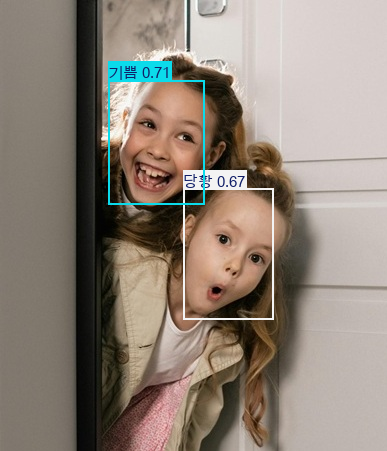

<Figure size 640x480 with 1 Axes>

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 2.], device='cuda:0')
conf: tensor([0.7126, 0.6683], device='cuda:0')
data: tensor([[108.8425,  80.3489, 204.4399, 204.4191,   0.7126,   1.0000],
        [183.9599, 188.2383, 273.2212, 319.4026,   0.6683,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (451, 387)
shape: torch.Size([2, 6])
xywh: tensor([[156.6412, 142.3840,  95.5973, 124.0702],
        [228.5905, 253.8204,  89.2614, 131.1643]], device='cuda:0')
xywhn: tensor([[0.4048, 0.3157, 0.2470, 0.2751],
        [0.5907, 0.5628, 0.2306, 0.2908]], device='cuda:0')
xyxy: tensor([[108.8425,  80.3489, 204.4399, 204.4191],
        [183.9599, 188.2383, 273.2212, 319.4026]], device='cuda:0')
xyxyn: tensor([[0.2812, 0.1782, 0.5283, 0.4533],
        [0.4753, 0.4174, 0.7060, 0.7082]], device='cuda:0')


In [78]:
#ÌôïÏù∏

# Î™®Îç∏ Î°úÎìú
model_Y = YOLO("/workspace/yoons/runs/detect/train/weights/best.onnx")

# ÏòàÏ∏°Ìï† Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
image_path = "/workspace/yoons/pexels-a-darmel-7642207sm_cr.jpg" #KakaoTalk_20250610_112232395.jpg" #

# Ï∂îÎ°†
results = model_Y(image_path)

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî (matplotlib ÏÇ¨Ïö©)
results[0].show()  # YOLO ÎÇ¥Î∂Ä show Ìï®Ïàò
# ÎòêÎäî
img = Image.open(image_path)
plt.imshow(results[0].plot())  # bounding box Ìè¨Ìï®Îêú Ïù¥ÎØ∏ÏßÄ
plt.axis('off')
plt.show()

# Í≤∞Í≥º Í∞ùÏ≤¥ ÌôïÏù∏
print(results[0].boxes)


In [ ]:
print(model.names)  # Ïòà: {0: 'Î∂ÑÎÖ∏', 1: 'Í∏∞ÏÅ®', 2: 'ÎãπÌô©', 3: 'Ïä¨Ìîî'}


{0: 'Î∂ÑÎÖ∏', 1: 'Í∏∞ÏÅ®', 2: 'ÎãπÌô©', 3: 'Ïä¨Ìîî'}


In [ ]:
for box in results[0].boxes:
    cls_id = int(box.cls[0])  # ÌÅ¥ÎûòÏä§ ID
    conf = float(box.conf[0])  # Ïã†Î¢∞ÎèÑ
    print(f"Í∞êÏ†ï: {model.names[cls_id]}, Ïã†Î¢∞ÎèÑ: {conf:.2f}")


Í∞êÏ†ï: Í∏∞ÏÅ®, Ïã†Î¢∞ÎèÑ: 0.47


In [ ]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.4729], device='cuda:0')
data: tensor([[6.7043e+02, 5.7767e+01, 1.3307e+03, 9.8185e+02, 4.7286e-01, 1.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[1000.5427,  519.8077,  660.2162,  924.0821]], device='cuda:0')
xywhn: tensor([[0.5211, 0.4813, 0.3439, 0.8556]], device='cuda:0')
xyxy: tensor([[ 670.4346,   57.7666, 1330.6508,  981.8487]], device='cuda:0')
xyxyn: tensor([[0.3492, 0.0535, 0.6930, 0.9091]], device='cuda:0')